In [1]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LinDiscAn
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QuadDiscAn

from sklearn import datasets
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

Пункт 1. 

1.1. Скачать данные Iris. 

1.2. Сделать DataFrame. 

1.3. Вычислить корреляции между всеми признаками на таблице и отдельно по классам. 

1.4. Визуализировать распределения.

In [2]:
# 1.1. Данные
iris = datasets.load_iris()

# iris.data - данные
# iris.target - классы цветков для каждой строки data
# iris.target_names - наименования классов цветков
# iris.feature_names - наименования признаков

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# 1.2. df
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['target'] = iris.target
df['target_names'] = df['target'].map(lambda x: iris.target_names[x])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [4]:
# 1.3.1 корреляции по всей таблице
df.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [5]:
# 1.3.2 корреляции по гру
df.drop(columns=['target']).groupby(['target_names']).corr()

sepal length (cm)  sepal width (cm)  \
target_names                                                          
setosa       sepal length (cm)           1.000000          0.742547   
             sepal width (cm)            0.742547          1.000000   
             petal length (cm)           0.267176          0.177700   
             petal width (cm)            0.278098          0.232752   
versicolor   sepal length (cm)           1.000000          0.525911   
             sepal width (cm)            0.525911          1.000000   
             petal length (cm)           0.754049          0.560522   
             petal width (cm)            0.546461          0.663999   
virginica    sepal length (cm)           1.000000          0.457228   
             sepal width (cm)            0.457228          1.000000   
             petal length (cm)           0.864225          0.401045   
             petal width (cm)            0.281108          0.537728   

                                petal length (cm)  petal width (cm)  
target_names                                                         
setosa       sepal length (cm)           0.267176          0.278098  
             sepal width (cm)            0.177700          0.232752  
             petal length (cm)           1.000000          0.331630  
             petal width (cm)            0.331630          1.000000  
versicolor   sepal length (cm)           0.754049          0.546461  
             sepal width (cm)            0.560522          0.663999  
             petal length (cm)           1.000000          0.786668  
             petal width (cm)            0.786668          1.000000  
virginica    sepal length (cm)           0.864225          0.281108  
             sepal width (cm)            0.401045          0.537728  
             petal length (cm)           1.000000          0.322108  
             petal width (cm)            0.322108          1.000000

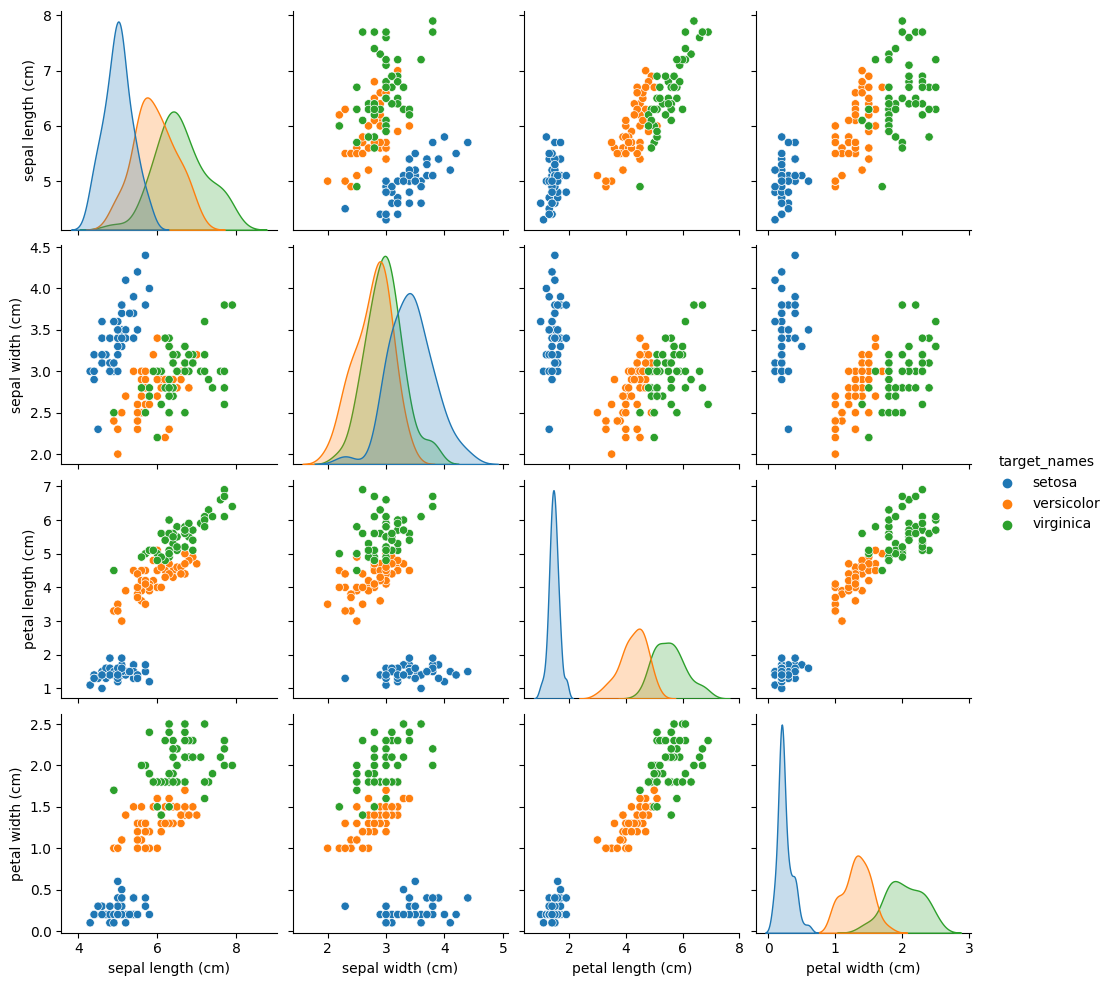

In [6]:
# 1.4. визуализация распределний с seaborn
sns.pairplot(df.iloc[:,[0,1,2,3,5]], hue = 'target_names')

Пункт 2.

Выбрать 2 переменные (пусть 0 и 1 (sepal length (cm), sepal width (cm)))

2.1. Построить и визуализировать решение методом линейный дискриминант

2.2. Квадратичный дискриминант

2.3. Логистическая пенпессмя

2.4. SVM линейное

2.5. SVM квадратичное

In [7]:
# общая функция для построения сетки визуализации
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# общая функция для предсказания значений у класификатора и контурирования областей графика
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

df_choose_targets = df[df['target'].isin((1,2))]
# df_choose_targets = df.copy()

X = df_choose_targets.iloc[:,:2].to_numpy()
y = df_choose_targets['target'].to_numpy()

X0, X1 = X[:, 0], X[:, 1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


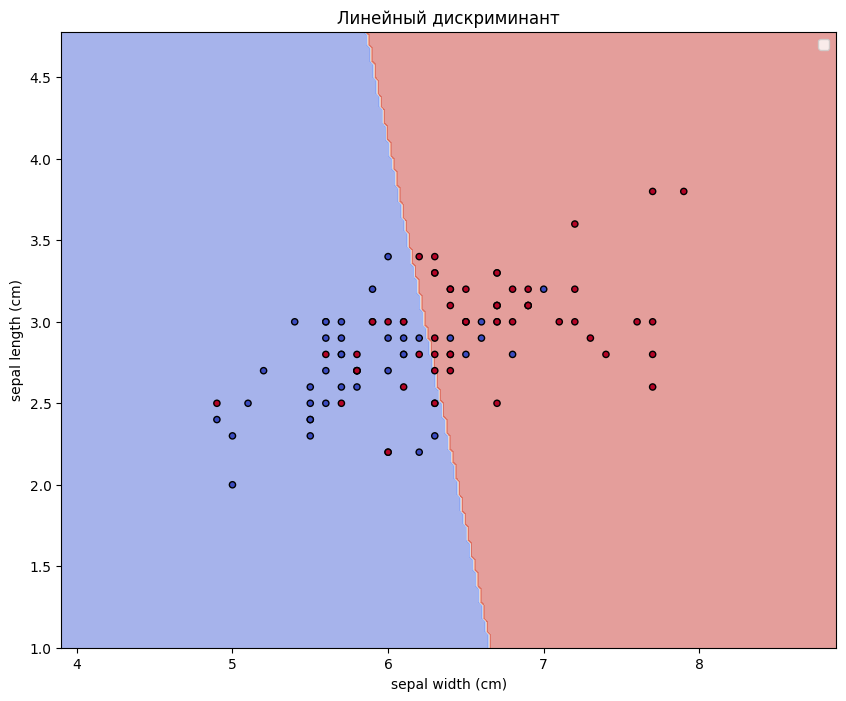

In [8]:
# 2.1. Лин дискриминант
modelLDA = LinDiscAn()
clfLDA = modelLDA.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clfLDA, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[0])
ax.set_xlabel(iris.feature_names[1])
ax.set_title('Линейный дискриминант')
ax.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


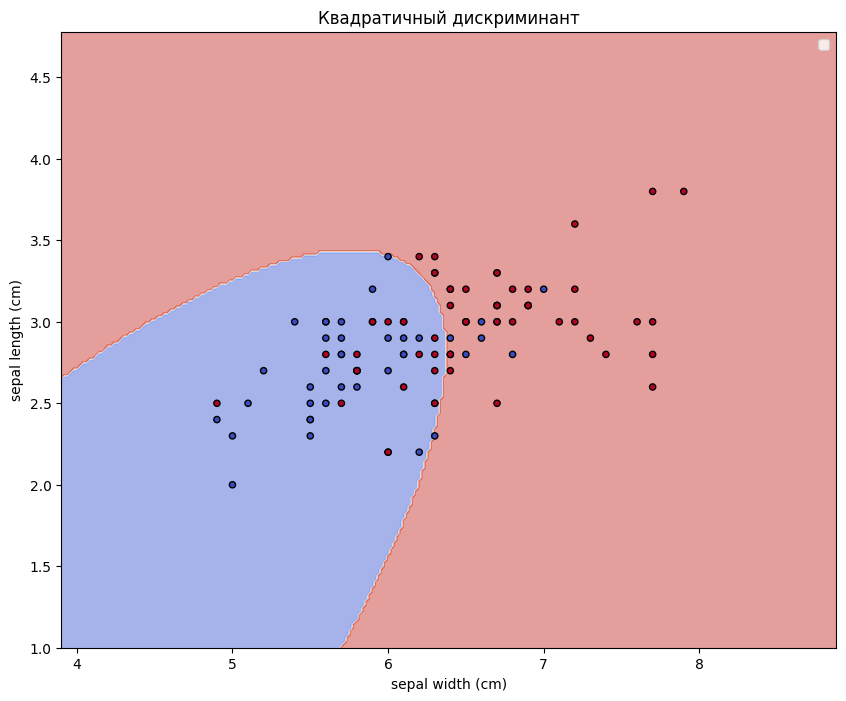

In [9]:
# 2.2. Кв дискриминант
modelQDA = QuadDiscAn()
clfQDA = modelQDA.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clfQDA, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[0])
ax.set_xlabel(iris.feature_names[1])
ax.set_title('Квадратичный дискриминант')
ax.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


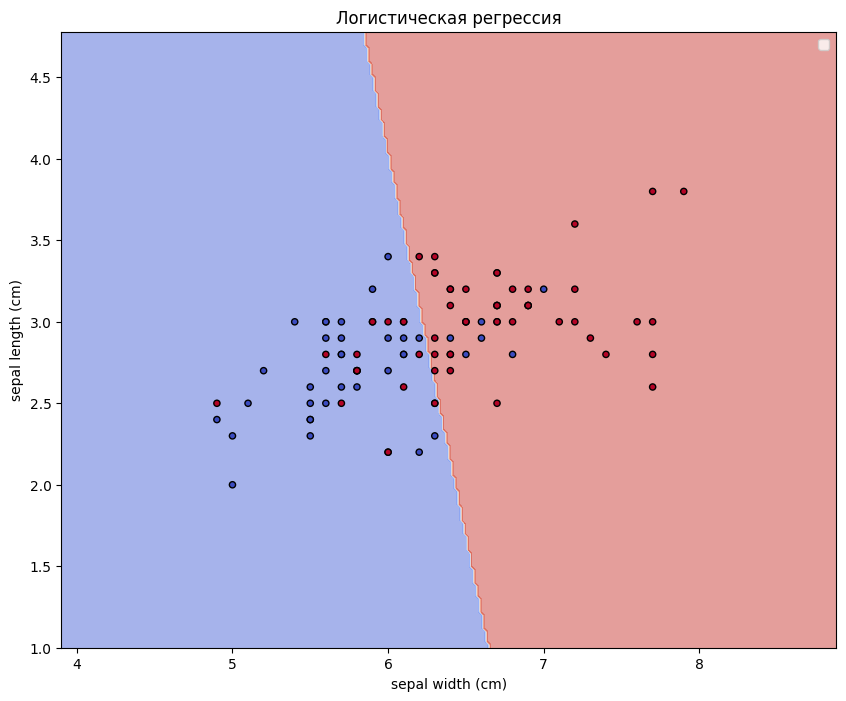

In [10]:
# 2.3. Лог регрессия
modelLR = LogReg(C=1e5, solver='lbfgs', multi_class='multinomial')
clfLR = modelLR.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clfLR, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[0])
ax.set_xlabel(iris.feature_names[1])
ax.set_title('Логистическая регрессия')
ax.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


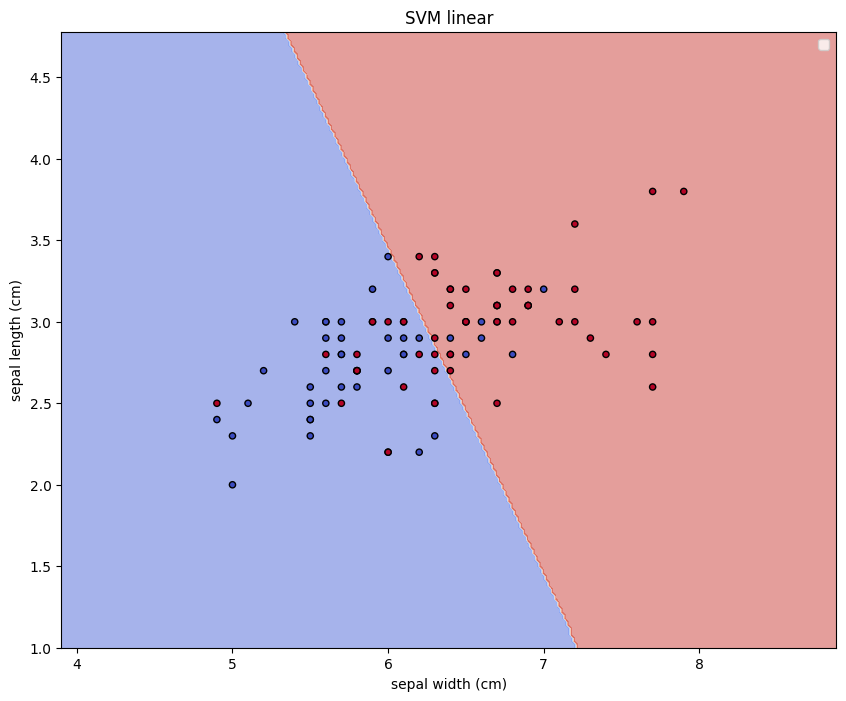

In [11]:
# 2.4. SVM linear
modelSVCL = SVC(kernel='linear')
clfSVCL = modelSVCL.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clfSVCL, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[0])
ax.set_xlabel(iris.feature_names[1])
ax.set_title('SVM linear')
ax.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


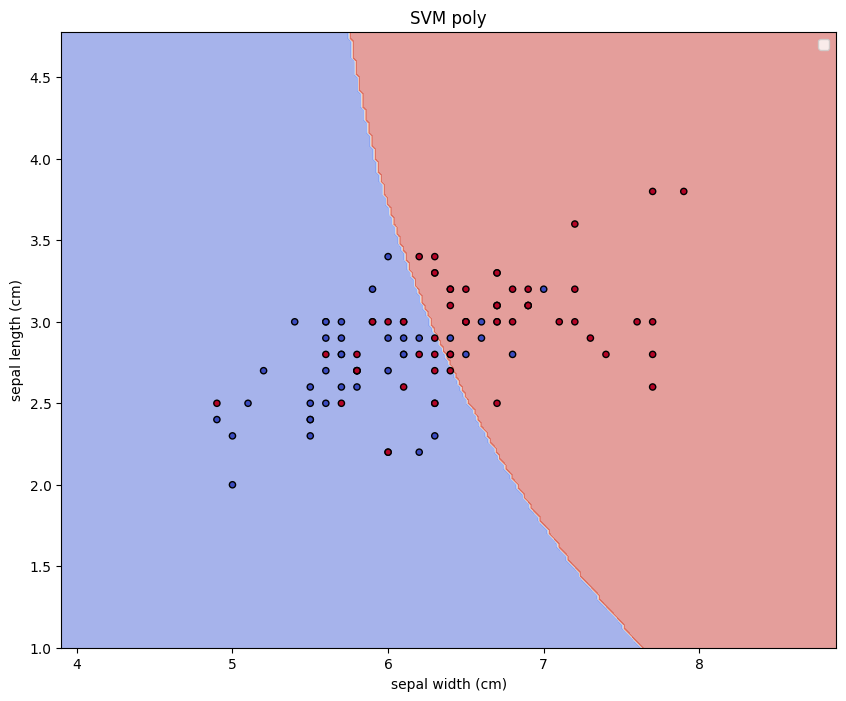

In [12]:
# 2.5. SVM poly
modelSVCP = SVC(kernel='poly')
clfSVCP = modelSVCP.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clfSVCP, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[0])
ax.set_xlabel(iris.feature_names[1])
ax.set_title('SVM poly')
ax.legend()
plt.show()


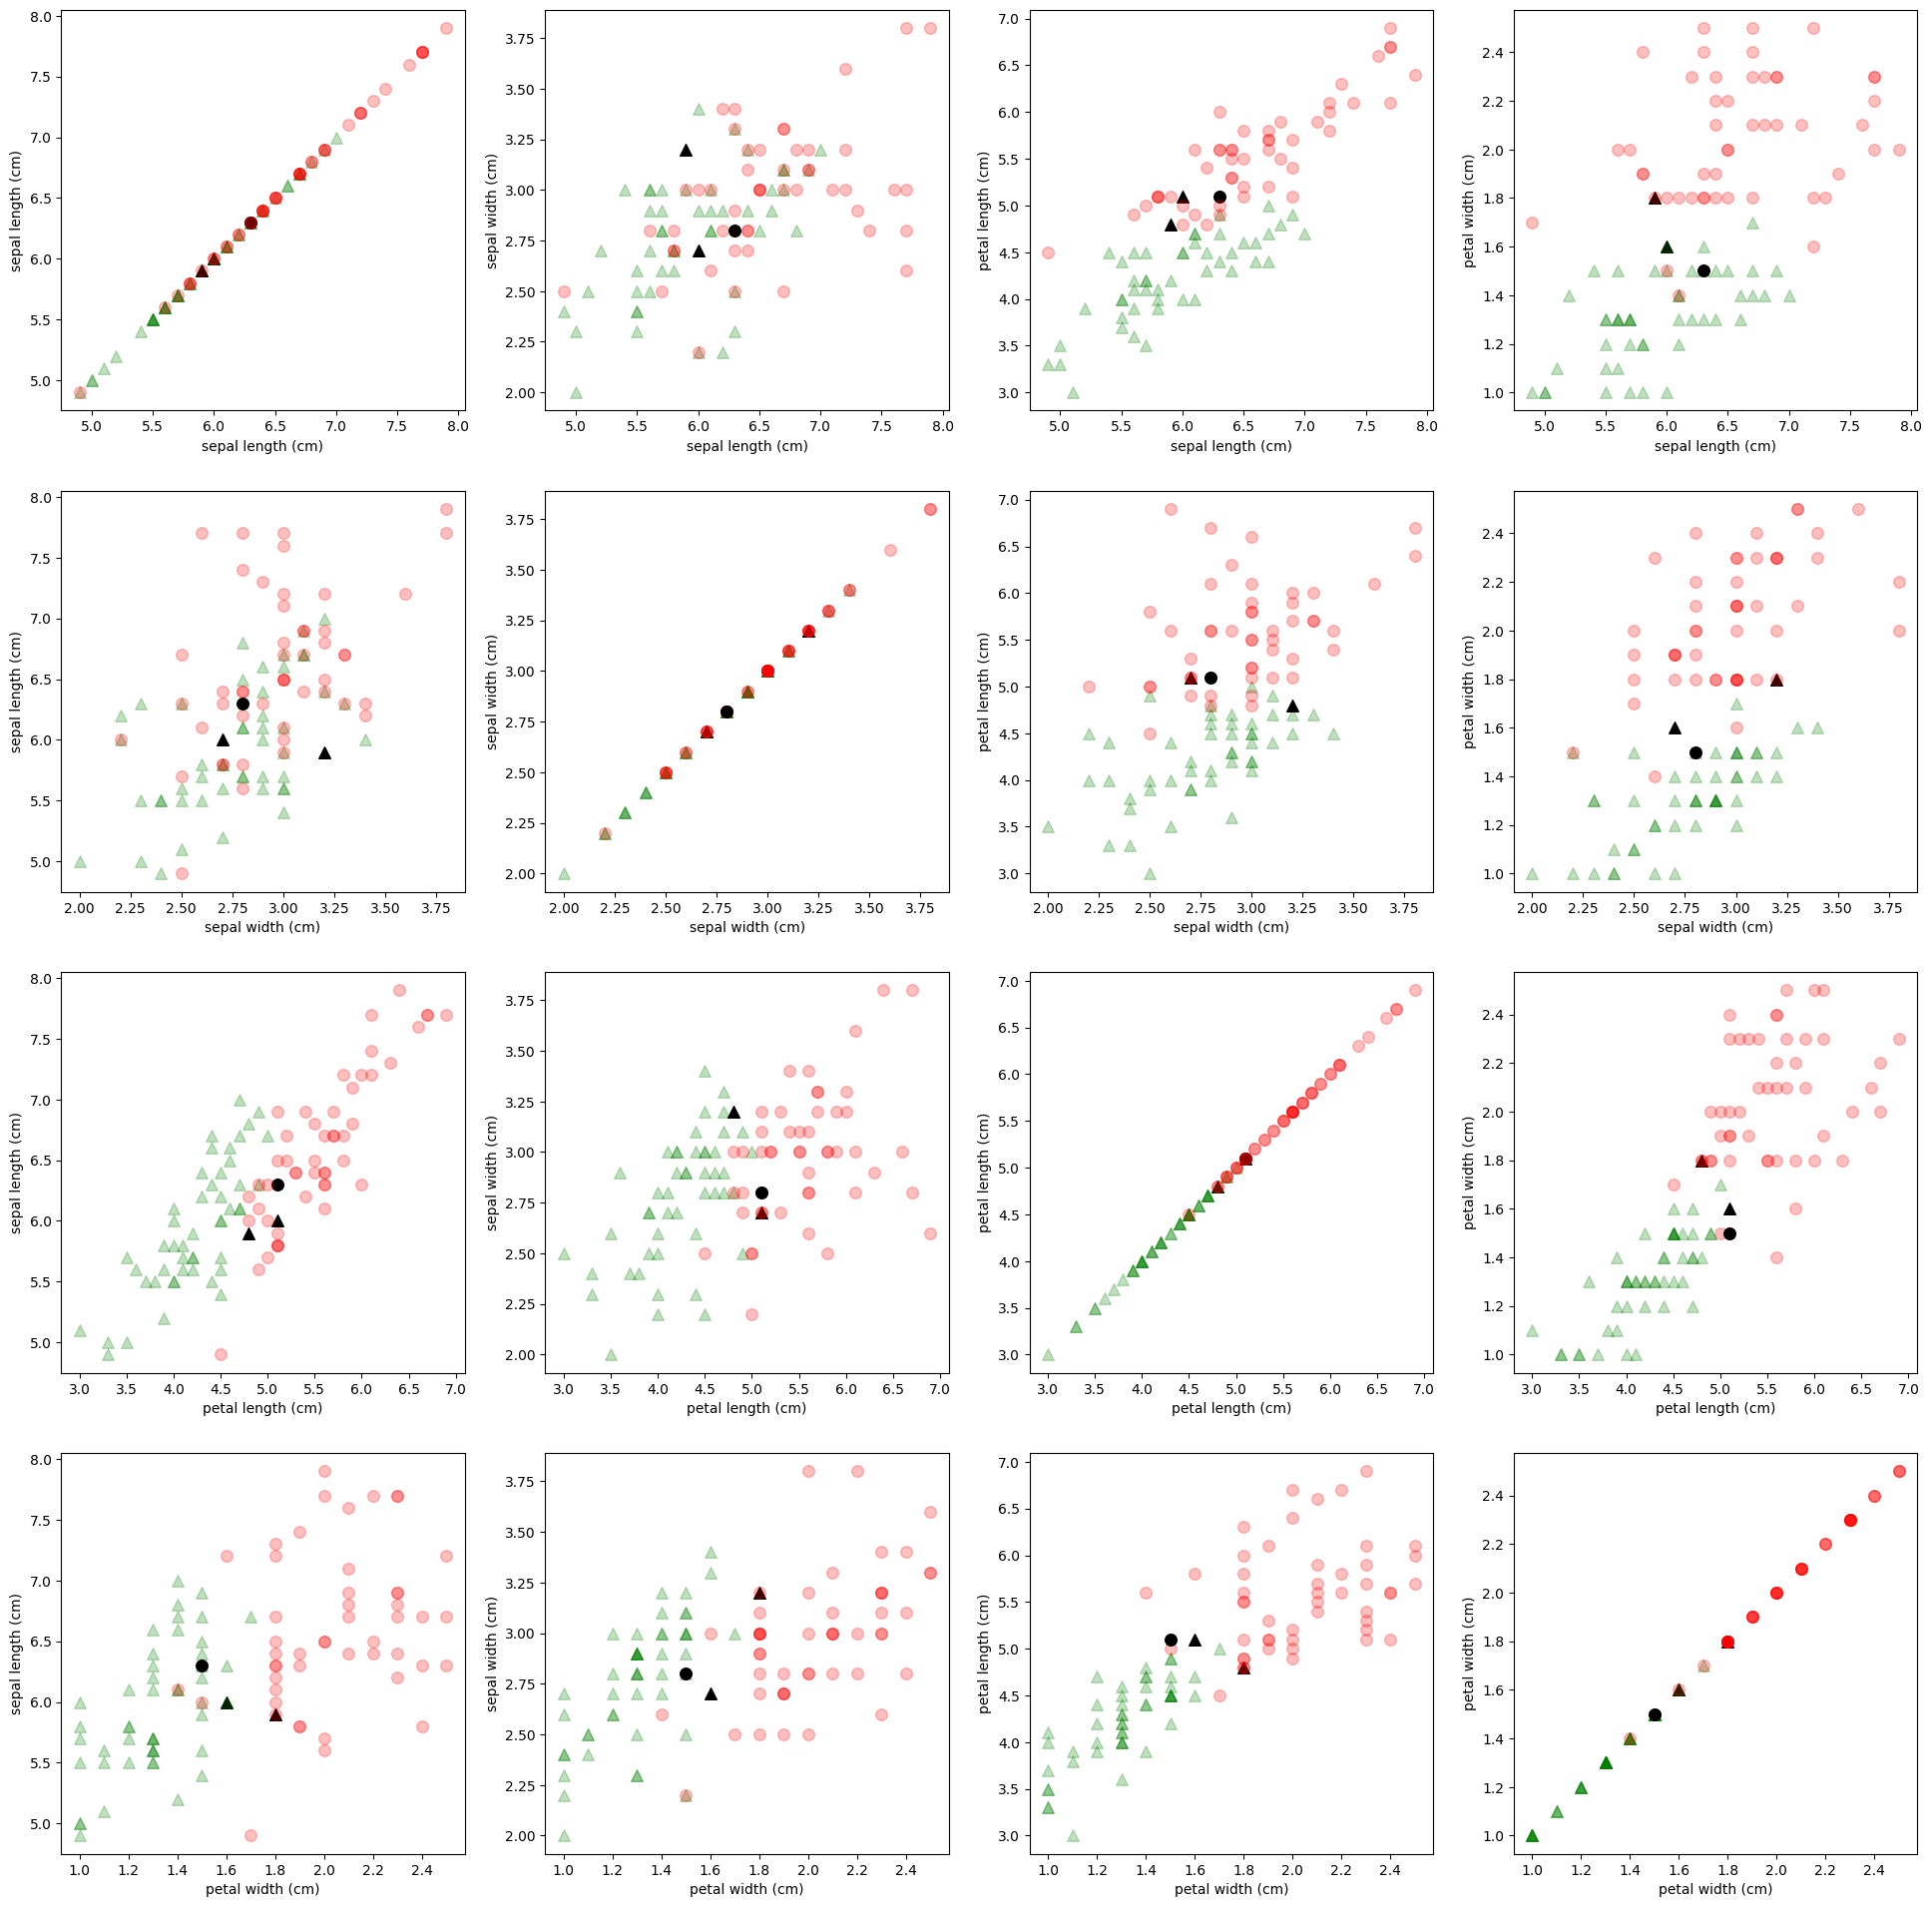

In [13]:
X_full = df_choose_targets.iloc[:,:4].to_numpy()
y_full = df_choose_targets['target'].to_numpy()

fig, axs = plt.subplots(4, 4, figsize=(24, 24))
markers = {0: '*', 1: '^', 2: 'o'}
colors = {0: 'blue', 1: 'green', 2: 'red'}
model = LinDiscAn()
clf = model.fit(X_full, y_full)
predictions = clf.predict(X_full)

for i in range(4):
    for j in range(4):
        axs[i, j].set_ylabel(iris.feature_names[j])
        axs[i, j].set_xlabel(iris.feature_names[i])
        df_local = df_choose_targets[[iris.feature_names[i], iris.feature_names[j], 'target', 'target_names']]
        X_local = df_local.iloc[:,:2].to_numpy()
        y_local = df_local['target'].to_numpy()
        
        number_of_mistakes = np.count_nonzero(y_local-predictions)
        for k in range(len(X_local)):
            if y_local[k] != predictions[k]:
                axs[i, j].scatter(X_local[k, 0], X_local[k, 1], marker = markers[y_local[k]], c = 'black', s = 70, alpha = 1)
            else:
                axs[i, j].scatter(X_local[k, 0], X_local[k, 1], marker = markers[y_local[k]], c = colors[predictions[k]], s = 70, alpha = 0.25)

Пункт 4

In [14]:
class Q_D:
    
    def __init__(self):
        self.classes = None
        self.pis = None
        self.mus = None
        self.sigmas = None
        
    
    def fit(self,X,y):
        self.classes = np.unique(y)
        self.pis = np.zeros(len(self.classes))
        self.mus = list()
        self.sigmas = list()
        
        for idx, c in enumerate(self.classes):
            X_class = X[y == c]
            self.pis[idx] = len(X_class) / len(X) # доля
            self.mus.append(np.mean(X_class, axis=0)) # mean
            self.sigmas.append(np.cov(X_class, rowvar=False)) # covariance

    def predict(self,X):
        
        y_pred = []
        for x in X:
            scores = []
            for idx, c in enumerate(self.classes):
                # Dk(x) = -1/2*(x-µk).T*(Σk)^-1*(x-µk) – 1/2*log|Σk| + log(πk)
                
                mu = self.mus[idx]
                sigma = self.sigmas[idx]
                sigma_inv = np.linalg.inv(sigma)
                pi = self.pis[idx]
                
                x_minus_mu = x - mu
                
                score_long_eq = np.dot(np.dot(x_minus_mu.T, sigma_inv), x_minus_mu)
                
                
                score = -0.5 * score_long_eq - 0.5 * np.log(np.linalg.det(sigma)) + np.log(pi)
                scores.append(score)
            
            predicted_class = self.classes[np.argmax(scores)]
            y_pred.append(predicted_class)
        return np.array(y_pred)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


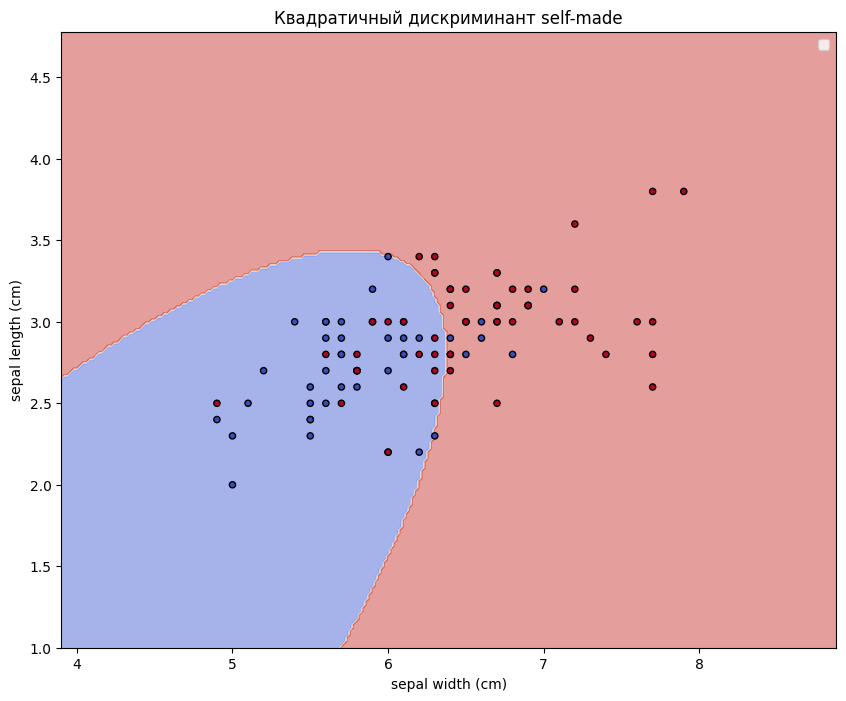

In [15]:
model_selfmade = Q_D()
+
model_selfmade.fit(X, y)
fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, model_selfmade, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[0])
ax.set_xlabel(iris.feature_names[1])
ax.set_title('Квадратичный дискриминант self-made')
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


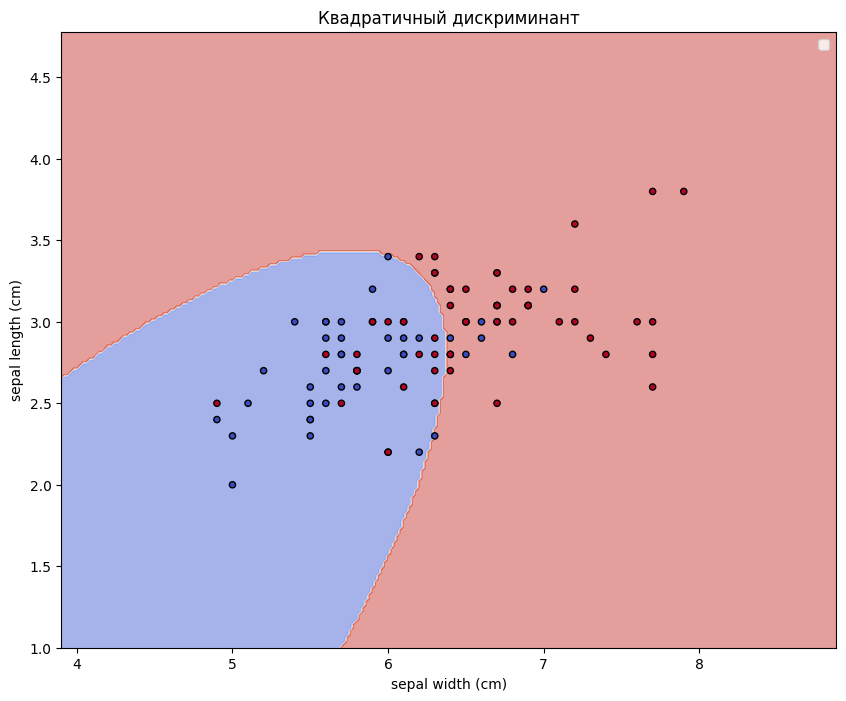

In [16]:
# 2.2. Кв дискриминант
modelQDA = QuadDiscAn()
clfQDA = modelQDA.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clfQDA, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[0])
ax.set_xlabel(iris.feature_names[1])
ax.set_title('Квадратичный дискриминант')
ax.legend()
plt.show()
